In [1]:
# !pip uninstall pyphi -y
# !git clone -b feature/iit-4.0 --single-branch https://github.com/wmayner/pyphi.git
# !pip install -e pyphi

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
from visualize_pyphi import *
from visualize_pyphi import utils
from visualize_pyphi import compute
import pickle as pkl
from tqdm.auto import tqdm
import numpy as np


Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



# 4 nodes linear

[array([0.79602215]),
 array([0.2645287]),
 array([0.06256359]),
 array([0.01667483])]

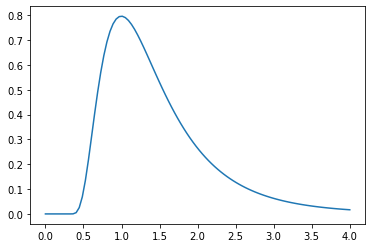

In [4]:
from scipy.stats import lognorm
import numpy as np
import pylab as pl

stddev = 0.6
mean = 0.3
dist=lognorm([stddev],loc=mean)
x=np.linspace(0,4,100)
pl.plot(x,dist.pdf(x))
[dist.pdf(x) for x in [1,2,3,4]]

[array([0.80463911]),
 array([0.26543981]),
 array([0.06071248]),
 array([0.01563378])]

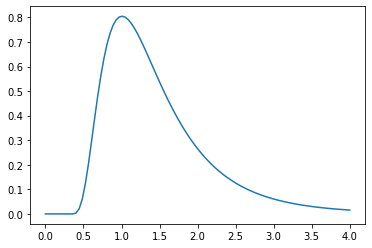

In [5]:
stddev = 0.59
mean = 0.3
dist=lognorm([stddev],loc=mean)
x=np.linspace(0,4,100)
pl.plot(x,dist.pdf(x))
[dist.pdf(x) for x in [1,2,3,4]]

In [6]:
# ch3 system creation
net_name = "space_4"

th = 1 / 4
exp = 5

s = .8
l = 0.26
f = 0.06
g = 0.0

weights = np.array(
    [
        [s, l, f, g],  # A
        [l, s, l, f],  # B
        [f, l, s, l],  # C
        [g, f, l, s],  # D
        #A, B, C, D,
    ]
)

# weights += np.random.random((6,6))/100
# weights = np.abs(weights)

node_labels = ["A", "B", "C", "D"]
mech_func = [f for f in "ssss"]

network = ng.get_net(
    mech_func,
    weights,
    exp=exp,
    th=th,
    node_labels=node_labels,
    network_name=net_name,
    pickle_network=True,
)

state = (0, 0, 0, 0)
subsystem = pyphi.Subsystem(network, state)

  0%|          | 0/16 [00:00<?, ?it/s]

Network saved to: space_4


In [7]:
ces = utils.flatten([[d.cause,d.effect] for d in pyphi.compute.ces(subsystem,parallel=True)])
all_compositional_states = compute.get_all_compositional_states(ces)
print('there are {} possible compositional states'.format(len(all_compositional_states)))

there are 2 possible compositional states


In [8]:
# all_compositional_states = [all_compositional_states[0]]

In [10]:
max_ces = max(
    [
        compute.filter_ces(subsystem, ces, compositional_state, max_relations_k=3)
        for compositional_state in tqdm(all_compositional_states)
    ],
    key=lambda c: c[0]["big phi"],
)

  0%|          | 0/2 [00:00<?, ?it/s]

[Parallel(n_jobs=120)]: Using backend MultiprocessingBackend with 120 concurrent workers.
[Parallel(n_jobs=120)]: Batch computation too fast (0.1974s.) Setting batch_size=2.
[Parallel(n_jobs=120)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=120)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=120)]: Done  48 tasks      | elapsed:    2.0s
[Parallel(n_jobs=120)]: Done  78 out of 288 | elapsed:    3.3s remaining:    8.8s
[Parallel(n_jobs=120)]: Done 107 out of 288 | elapsed:    4.5s remaining:    7.6s
[Parallel(n_jobs=120)]: Done 136 out of 288 | elapsed:    5.2s remaining:    5.8s
[Parallel(n_jobs=120)]: Done 165 out of 288 | elapsed:    6.3s remaining:    4.7s
[Parallel(n_jobs=120)]: Done 194 out of 288 | elapsed:    7.7s remaining:    3.7s
[Parallel(n_jobs=120)]: Done 223 out of 288 | elapsed:    8.2s remaining:    2.4s
[Parallel(n_jobs=120)]: Done 252 out of 288 | elapsed:    9.3s remaining:    1.3s
[Parallel(n_jobs=120)]: Done 281 out of 288 | elapsed:    9.7s 

In [13]:
max_ces[0]['big phi']

2650.8921595971246

In [14]:
utils.sepces2df(max_ces[0]['ces'],subsystem)

,mechanism,direction,purview,state,phi
0,A,CAUSE,A,0,0.520382
1,A,EFFECT,A,0,0.656129
2,B,CAUSE,B,0,0.629285
3,B,EFFECT,B,0,0.713724
4,C,CAUSE,C,0,0.629285
5,C,EFFECT,C,0,0.713724
6,D,CAUSE,D,0,0.520382
7,D,EFFECT,D,0,0.656129
8,AB,CAUSE,AB,00,0.071485
9,AB,EFFECT,AB,00,0.069119


In [12]:
max_ces['MIP']

(((0,), (1, 2, 3)), (0,), (1, 2, 3), CAUSE)

In [103]:
# utils.sepces2df(ces,subsystem)

In [12]:

fig = viz.plot_ces(subsystem,max_ces['ces'],max_ces['relations'],network_name='figures/space',surface_opacity=0.7,)

Computing edges:   0%|          | 0/130 [00:00<?, ?it/s]

Computing triangles:   0%|          | 0/456 [00:00<?, ?it/s]

# 4 nodes toroidal

In [74]:
# ch3 system creation
net_name = "space_4"

th = 1 / 4
exp = 5

s = 0.8
l = 0.25

weights = np.array(
    [
        [s, l, 0, l],  # A
        [l, s, l, 0],  # B
        [0, l, s, l],  # C
        [l, 0, l, s],  # D
        #A, B, C, D,
    ]
)

# weights += np.random.random((6,6))/100
# weights = np.abs(weights)

node_labels = ["A", "B", "C", "D"]
mech_func = [f for f in "ssss"]

network = ng.get_net(
    mech_func,
    weights,
    exp=exp,
    th=th,
    mu=mu,
    si=si,
    l=ll,
    k=kk,
    x0=x0,
    node_labels=node_labels,
    network_name=net_name,
    pickle_network=True,
)

state = (0, 0, 0, 0)
subsystem = pyphi.Subsystem(network, state)

  0%|          | 0/16 [00:00<?, ?it/s]

Network saved to: space_4


In [75]:
ces = utils.flatten([[d.cause,d.effect] for d in pyphi.compute.ces(subsystem,parallel=True)])
all_compositional_states = compute.get_all_compositional_states(ces)
print('there are {} possible compositional states'.format(len(all_compositional_states)))


Computing concepts: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:02<00:00,  7.19it/s]
                                                                                                                                                         

there are 1 possible compositional states


In [76]:
max_ces = max(
    [
        compute.filter_ces_parallel(subsystem, ces, compositional_state, max_relations_k=3, n_jobs=200)
        for compositional_state in tqdm(all_compositional_states)
    ],
    key=lambda c: c["big phi"],
)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=200)]: Using backend MultiprocessingBackend with 200 concurrent workers.
[Parallel(n_jobs=200)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=200)]: Done   3 out of   5 | elapsed:    7.2s remaining:    4.8s
[Parallel(n_jobs=200)]: Done   5 out of   5 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=200)]: Done   5 out of   5 | elapsed:    7.2s finished


In [77]:
max_ces['big phi']

1183.2692733561953

In [78]:
utils.sepces2df(max_ces['ces'],subsystem)

,mechanism,direction,purview,state,phi
0,A,CAUSE,A,0,0.595967
1,A,EFFECT,A,0,0.700939
2,B,CAUSE,B,0,0.595967
3,B,EFFECT,B,0,0.700939
4,C,CAUSE,C,0,0.595967
5,C,EFFECT,C,0,0.700939
6,D,CAUSE,D,0,0.595967
7,D,EFFECT,D,0,0.700939
8,AB,CAUSE,AB,00,0.064884
9,AB,EFFECT,AB,00,0.081128


In [79]:
max_ces['MIP']

(((0,), (1, 2, 3)), (0,), (1, 2, 3), CAUSE)

In [12]:

fig = viz.plot_ces(subsystem,max_ces['ces'],max_ces['relations'],network_name='figures/space',surface_opacity=0.7,)

Computing edges:   0%|          | 0/130 [00:00<?, ?it/s]

Computing triangles:   0%|          | 0/456 [00:00<?, ?it/s]

# 5 nodes linear

In [115]:
# ch3 system creation
net_name = "space_5"

th = 1 / 4
exp = 5

s = 0.8
l = 0.25
f = 0.06
g = 0.01

weights = np.array(
    [
        [s, l, f, g, 0],  # A
        [l, s, l, f, g],  # B
        [f, l, s, l, f],  # C
        [g, f, l, s, l],  # D
        [0, g, f, l, s],  # E
        #A, B, C, D, E
    ]
)

# weights += np.random.random((6,6))/100
# weights = np.abs(weights)

node_labels = ["A", "B", "C", "D", "E"]
mech_func = [f for f in "sssss"]

network = ng.get_net(
    mech_func,
    weights,
    exp=exp,
    th=th,
    node_labels=node_labels,
    network_name=net_name,
    pickle_network=True,
)

state = (0, 0, 0, 0, 0)
subsystem = pyphi.Subsystem(network, state)

  0%|          | 0/32 [00:00<?, ?it/s]

Network saved to: space_5


In [116]:
ces = utils.flatten([[d.cause,d.effect] for d in pyphi.compute.ces(subsystem,parallel=True)])
all_compositional_states = compute.get_all_compositional_states(ces)
print('there are {} possible compositional states'.format(len(all_compositional_states)))

there are 8 possible compositional states


In [ ]:
all_compositional_states = [all_compositional_states[0]]

In [119]:
max_ces = compute.filter_ces_parallel(subsystem, ces, compute.compositional_state_from_system_state(subsystem.state), max_relations_k=3, n_jobs=-1)

  0%|          | 0/414720 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 224 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 313 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 477 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 520 tasks      

KeyboardInterrupt: 

Process ForkPoolWorker-6800:
Process ForkPoolWorker-6802:
Process ForkPoolWorker-6774:
Process ForkPoolWorker-6755:
Process ForkPoolWorker-6798:
Process ForkPoolWorker-6805:
Process ForkPoolWorker-6788:
Process ForkPoolWorker-6794:
Process ForkPoolWorker-6814:
Process ForkPoolWorker-6797:
Process ForkPoolWorker-6804:
Process ForkPoolWorker-6811:
Process ForkPoolWorker-6776:
Process ForkPoolWorker-6815:
Process ForkPoolWorker-6806:
Process ForkPoolWorker-6795:
Process ForkPoolWorker-6773:
Process ForkPoolWorker-6801:
Process ForkPoolWorker-6803:
Process ForkPoolWorker-6796:
Process ForkPoolWorker-6771:
Process ForkPoolWorker-6761:
Process ForkPoolWorker-6777:
Process ForkPoolWorker-6807:
Process ForkPoolWorker-6787:
Process ForkPoolWorker-6750:
Process ForkPoolWorker-6792:
Process ForkPoolWorker-6769:
Process ForkPoolWorker-6758:
Process ForkPoolWorker-6778:
Process ForkPoolWorker-6779:
Process ForkPoolWorker-6782:
Process ForkPoolWorker-6785:
Process ForkPoolWorker-6799:
Process ForkPo

In [ ]:
max_ces['big phi']

In [ ]:
utils.sepces2df(max_ces['ces'],subsystem)

In [ ]:
max_ces['MIP']

In [12]:

fig = viz.plot_ces(subsystem,max_ces['ces'],max_ces['relations'],network_name='figures/space',surface_opacity=0.7,)

Computing edges:   0%|          | 0/130 [00:00<?, ?it/s]

Computing triangles:   0%|          | 0/456 [00:00<?, ?it/s]

In [26]:
import itertools
compositional_state = compute.compositional_state_from_system_state(subsystem.state)

# first separate the ces into mices and define the directions
c = pyphi.direction.Direction.CAUSE
e = pyphi.direction.Direction.EFFECT

# next we run through all the mices and append any mice that has a state corresponding to the compositional state
mices_with_correct_state = dict()  # compositional_state.copy()
for mice in ces:
    if (
        tuple(mice.specified_state[0])
        == compositional_state[mice.direction][mice.purview]
    ):
        if not (mice.direction, mice.purview) in mices_with_correct_state.keys():
            mices_with_correct_state[(mice.direction, mice.purview)] = [mice]
        else:
            mices_with_correct_state[(mice.direction, mice.purview)].append(mice)

all_cess = list(itertools.product(*mices_with_correct_state.values()))

In [27]:
len(all_cess)

36864

In [31]:
[len(l) for l in mices_with_correct_state.values()]

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1]

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
dists = np.array([[np.random.lognormal(m,s,100000) for m in [0,0.5,1,2]] for s in [0.1, 0.5, 1, 3]])
        

In [54]:
bins=np.linspace(0,10,100)

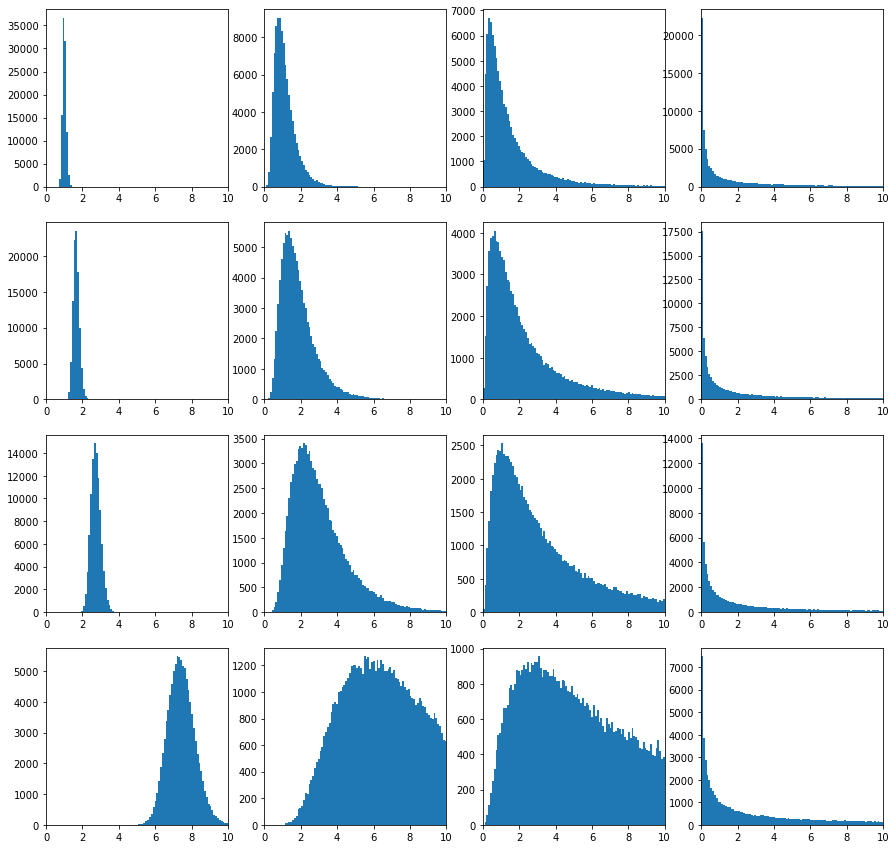

In [55]:
ms = dists.shape[0]
ss = dists.shape[1]

plt.figure(figsize=(15,15))
for i in range(ms):
    for j in range(ss):
        plt.subplot(ss,ms,i+j*ms+1)
        plt.hist(dists[i,j,:],bins=bins)
        plt.xlim([0,10])

In [62]:
network_generator.NR(1, 5, 0.25)

0.8

In [63]:
exp = 5
th = 0.25

x = np.linspace(0,2,100)
y = np.array([network_generator.NR(xx, exp, th) for xx in x])


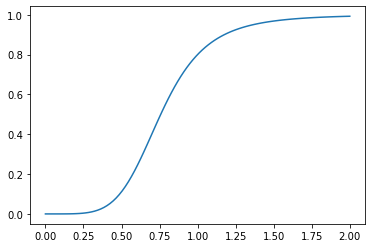

In [64]:
plt.plot(x,y)

In [93]:

vals = [0.7, 0.25, 0.1]
ps = [network_generator.NR(xx, exp, th) for xx in vals]

In [94]:
ps

[0.4020140167914463, 0.0038910505836575876, 3.9998400063997445e-05]